Plot depth-averaged MMT standard errors

In [6]:
import numpy as np
import xarray as xr
import cmocean as cmocean
import numpy.linalg as la
from scipy.io import netcdf
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from xgcm import Grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import SymLogNorm, BoundaryNorm, LogNorm
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import MaxNLocator


mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']

In [2]:
# Snapshot
root = '/scratch/mp6191/NW2_TracerBackscatter'
name = '__xarray_dataarray_variable__'

exp = '/p5_noBS_KHTR0_2'
p5_noBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name]#.load()
p5_noBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p5_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')#.load()

exp = '/p5_SQGBS_KHTR0_2'
p5_SQGBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)['kappa1']#.load()
p5_SQGBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)['kappa2']#.load()
p5_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')#.load()

exp = '/p25_noBS_2'
p25_noBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name]#.load()
p25_noBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p25_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')#.load()

exp = '/p25_SQGBS_2'
p25_SQGBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p25_SQGBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p25_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')#.load()

exp = '/p03125_2'
p03125_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False)['kappa1']#.load()
p03125_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False)['kappa2']#.load()
p03125_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p03125_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p03125_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')#.load()

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [3]:
def depth_integrate_kappa(kappa, h, res):

    coarsen_scale = int(2 / res)
    h_coarsen = h.coarsen(xh = coarsen_scale, yh = coarsen_scale, boundary = 'exact').mean()

    kappa_int = (kappa * h_coarsen).sum('zl') / h_coarsen.sum('zl')

    return kappa_int.load()

### Plot

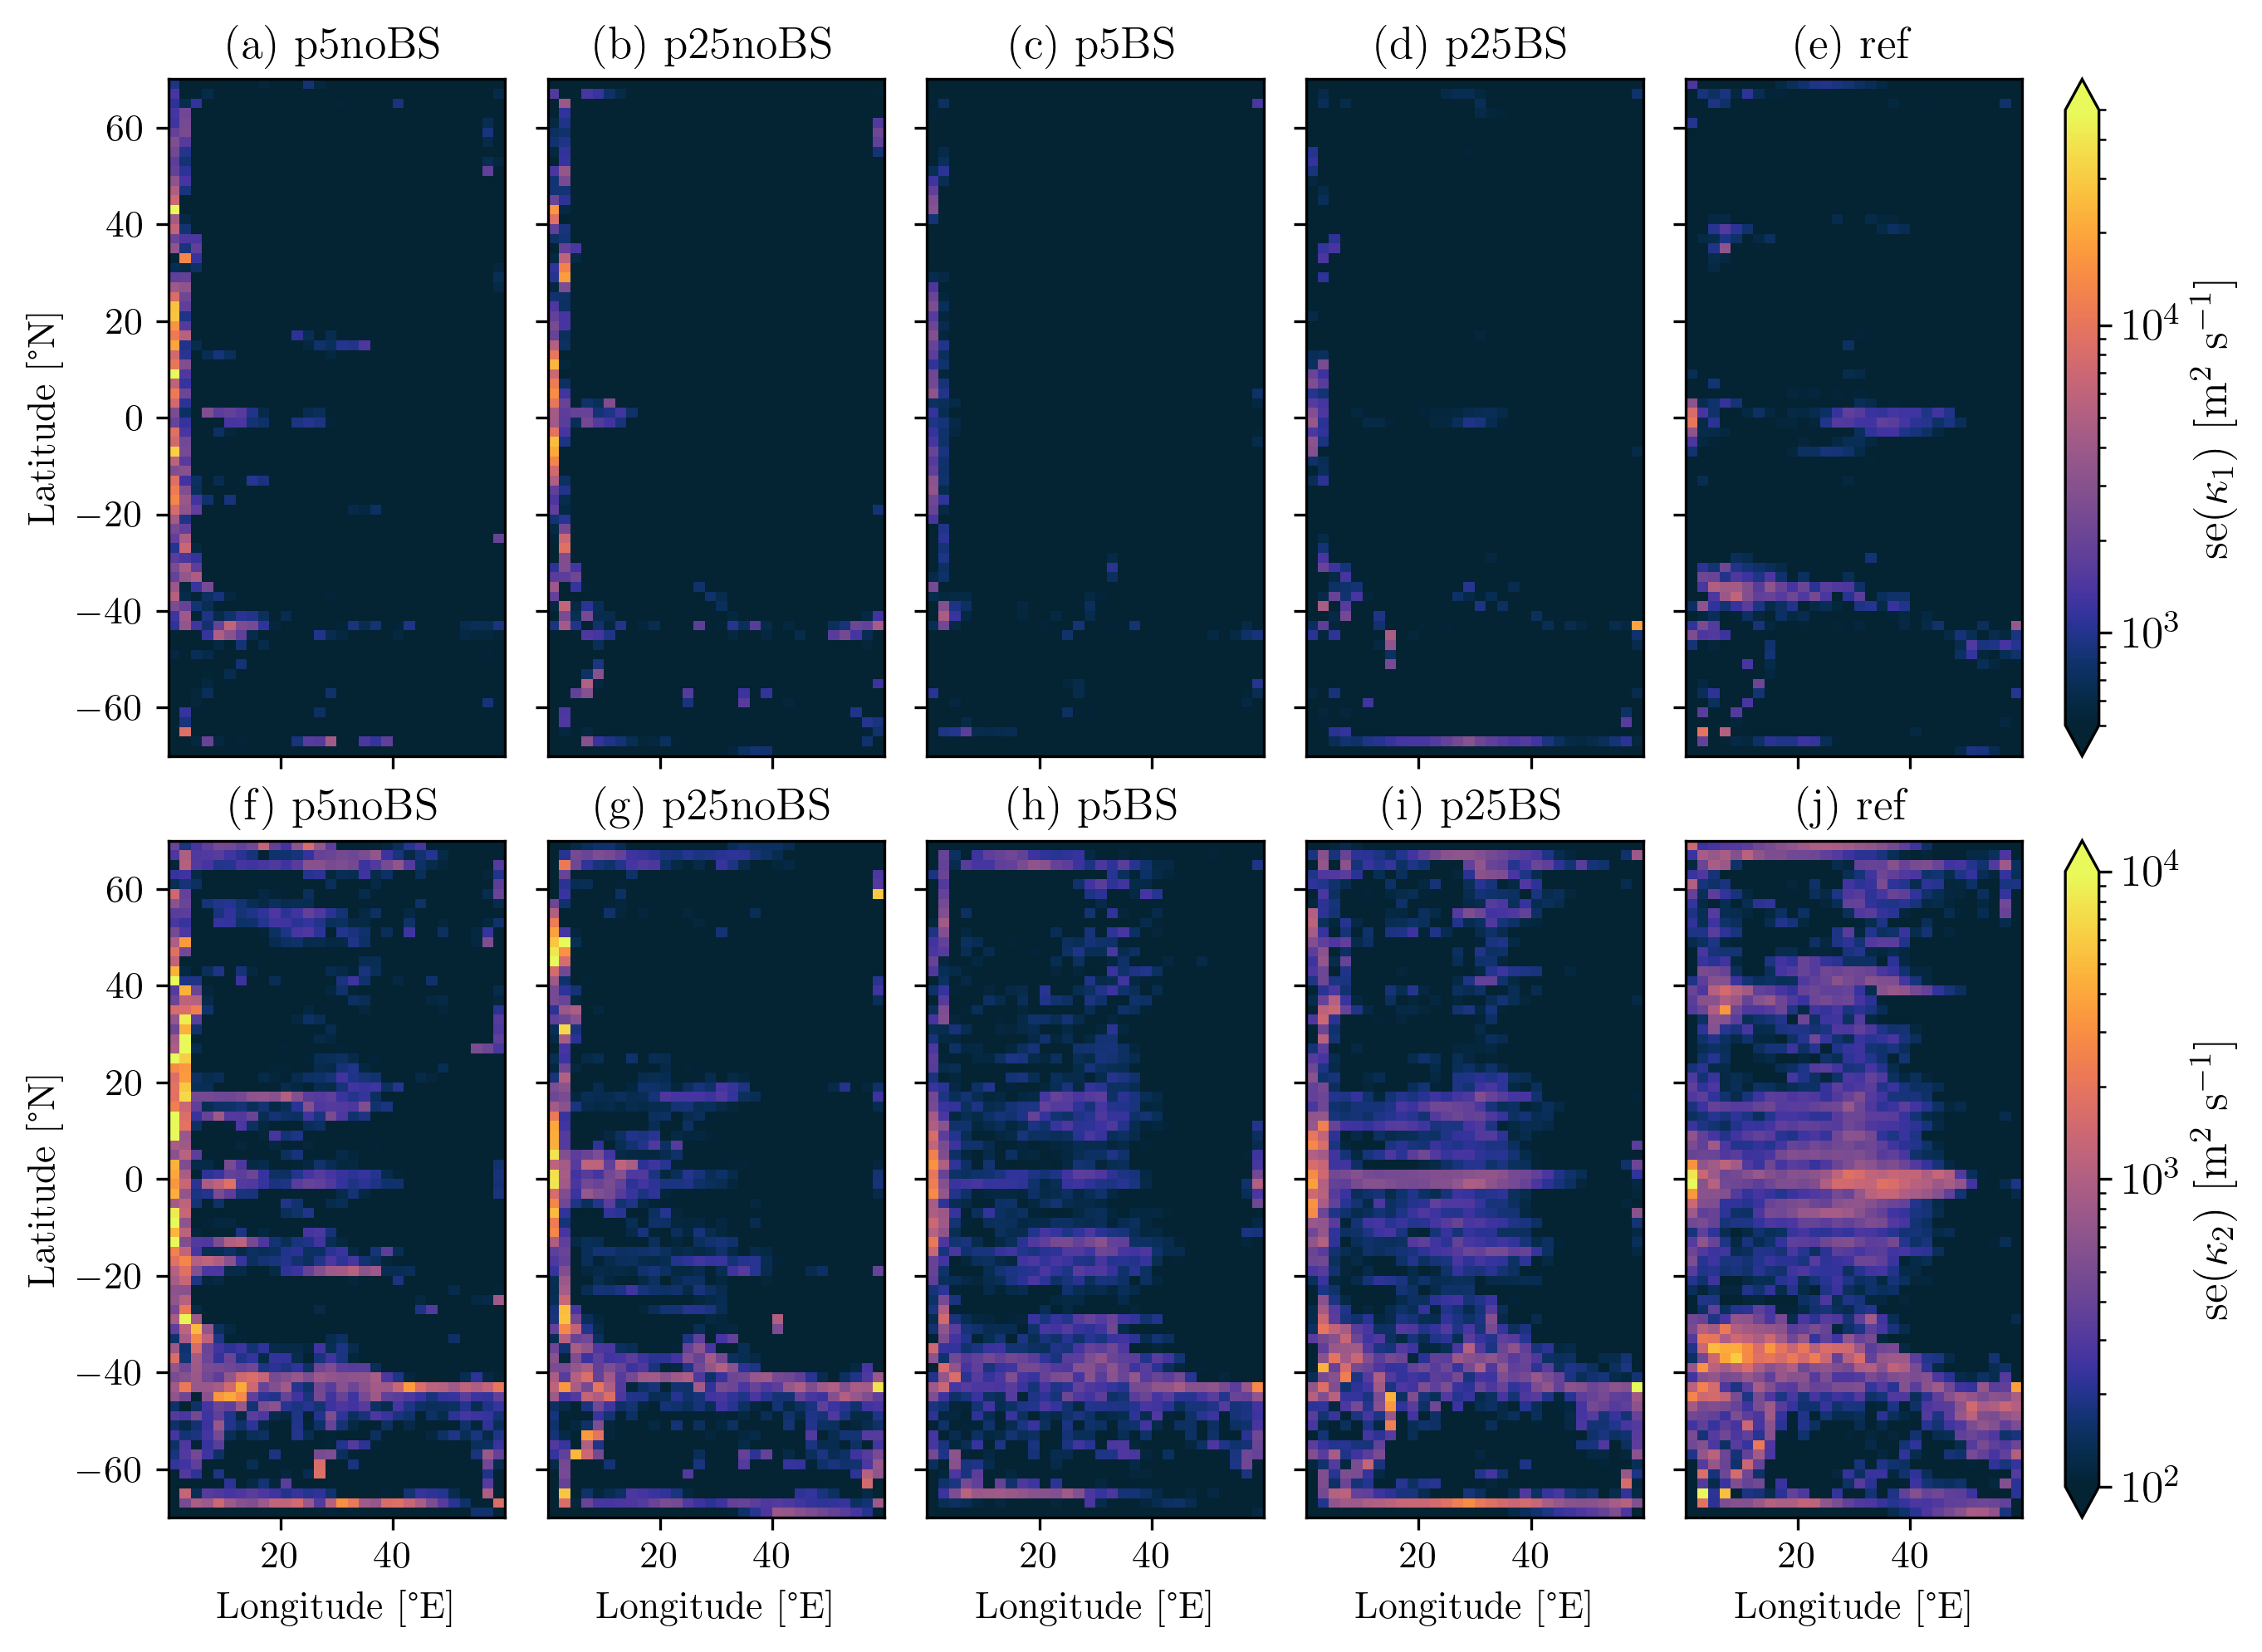

In [8]:
# Create figure
fig = plt.figure(figsize = (10, 7.5), dpi = 300)  # increased height for new row
gs = gridspec.GridSpec(2, 6, width_ratios = [1, 1, 1, 1, 1, 0.1], height_ratios = [1, 1], wspace = 0.15, hspace = 0.125)
fontsize = 13

# First row: 6 subplots + colorbar
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
cbar_ax_1 = fig.add_subplot(gs[0, 5])

# Second row: 6 subplots + colorbar
ax6 = fig.add_subplot(gs[1, 0])
ax7 = fig.add_subplot(gs[1, 1])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[1, 3])
ax10 = fig.add_subplot(gs[1, 4])
cbar_ax_2 = fig.add_subplot(gs[1, 5])

# kappa1
vmin = 5e2
vmax = 5e4
cmap = cmocean.cm.thermal
cmap.set_bad(color='k')
norm = LogNorm(vmin = vmin, vmax = vmax)

ax = ax1
ax.set_facecolor('k')
ds = depth_integrate_kappa(p5_noBS_kappa1_err, p5_noBS_h, 1/2)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(a) p5noBS', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize - 2)
ax.set_ylabel('Latitude [°N]', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

ax = ax2
ax.set_facecolor('k')
ds = depth_integrate_kappa(p25_noBS_kappa1_err, p25_noBS_h, 1/4)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(b) p25noBS', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

ax = ax3
ax.set_facecolor('k')
ds = depth_integrate_kappa(p5_SQGBS_kappa1_err, p5_SQGBS_h, 1/2)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(c) p5BS', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

ax = ax4
ax.set_facecolor('k')
ds = depth_integrate_kappa(p25_SQGBS_kappa1_err, p25_SQGBS_h, 1/4)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(d) p25BS', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

ax = ax5
ax.set_facecolor('k')
ds = depth_integrate_kappa(p03125_kappa1_err, p03125_h, 1/32)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(e) ref', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

#Add colorbar to the last column
cbar = fig.colorbar(plotted, cax = cbar_ax_1, extend = 'both')
cbar.set_label(r'se($\kappa_1$) [m$^2$ s$^{-1}$]', fontsize = fontsize, labelpad = 2)
cbar.ax.tick_params(labelsize = fontsize)

# Hide labels
ax1.tick_params(labelbottom = False)
ax2.tick_params(labelleft = False, labelbottom = False)
ax3.tick_params(labelleft = False, labelbottom = False)
ax4.tick_params(labelleft = False, labelbottom = False)
ax5.tick_params(labelleft = False, labelbottom = False)

# kappa2
vmin = 1e2
vmax = 1e4
cmap = cmocean.cm.thermal
cmap.set_bad(color='k')
norm = LogNorm(vmin = vmin, vmax = vmax)

ax = ax6
ax.set_facecolor('k')
ds = depth_integrate_kappa(p5_noBS_kappa2_err, p5_noBS_h, 1/2)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(f) p5noBS', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize - 2)
ax.set_ylabel('Latitude [°N]', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))   

ax = ax7
ax.set_facecolor('k')
ds = depth_integrate_kappa(p25_noBS_kappa2_err, p25_noBS_h, 1/4)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(g) p25noBS', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))   

ax = ax8
ax.set_facecolor('k')
ds = depth_integrate_kappa(p5_SQGBS_kappa2_err, p5_SQGBS_h, 1/2)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(h) p5BS', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

ax = ax9
ax.set_facecolor('k')
ds = depth_integrate_kappa(p25_SQGBS_kappa2_err, p25_SQGBS_h, 1/4)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(i) p25BS', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

ax = ax10
ax.set_facecolor('k')
ds = depth_integrate_kappa(p03125_kappa2_err, p03125_h, 1/32)
ds = ds.where(ds >= 0, np.nan)
plotted = ax.pcolormesh(ds.xh, ds.yh, ds.T, cmap = cmap, norm = norm)
ax.set_title(f'(j) ref', fontsize = fontsize)
ax.set_xlabel('Longitude [°E]', fontsize = fontsize - 2)
ax.set_ylabel('', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(np.linspace(20, 40, 2))

#Add colorbar to the last column
cbar = fig.colorbar(plotted, cax = cbar_ax_2, extend = 'both')
cbar.set_label(r'se($\kappa_2$) [m$^2$ s$^{-1}$]', fontsize = fontsize, labelpad = 2)
cbar.ax.tick_params(labelsize = fontsize)

# Hide duplicate tick labels for a cleaner look
ax7.tick_params(labelleft = False)
ax8.tick_params(labelleft = False)
ax9.tick_params(labelleft = False)
ax10.tick_params(labelleft = False)

plt.savefig('Fig_depth_ave_MMT_err.png', bbox_inches = 'tight', dpi = 300)